<a href="https://colab.research.google.com/github/nazarb/Mining/blob/main/coco2yolov5_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert Coco JSON Annotations to YOLO TXT Files
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

The code allows to use unsplitted COCO dataset, convert it to YOLO and split into 50%, 25%, and 25% percent for train, test and val. After the completion of the code all temporary data are deleted.

The code is based on:
https://github.com/pylabel-project/samples/blob/main/yolov5_training.ipynb

If the code is used with QGIS Deep Learning Dataset Learning it is nessary to delete "info" section using https://ogaoga.github.io/json-visual-editor/ and change the "image" to the name of the feature.

The script is intended to study "mine"


In [36]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fid = drive.ListFile({'q':"title='Wes_11_3_wgs_COCO.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Wes_11_3_wgs_COCO.zip')

In [37]:
!unzip "/content/Wes_11_3_wgs_COCO.zip"

Archive:  /content/Wes_11_3_wgs_COCO.zip
   creating: COCO/annotations/
  inflating: COCO/annotations/117_image_0.tif  
  inflating: COCO/annotations/170_image_0.tif  
  inflating: COCO/annotations/170_image_1.tif  
  inflating: COCO/annotations/189_image_0.tif  
  inflating: COCO/annotations/189_image_1.tif  
  inflating: COCO/annotations/195_image_0.tif  
  inflating: COCO/annotations/208_image_0.tif  
  inflating: COCO/annotations/209_image_0.tif  
  inflating: COCO/annotations/209_image_1.tif  
  inflating: COCO/annotations/209_image_2.tif  
  inflating: COCO/annotations/209_image_3.tif  
  inflating: COCO/annotations/210_image_0.tif  
  inflating: COCO/annotations/210_image_1.tif  
  inflating: COCO/annotations/210_image_2.tif  
  inflating: COCO/annotations/214_image_0.tif  
  inflating: COCO/annotations/215_image_0.tif  
  inflating: COCO/annotations/215_image_1.tif  
  inflating: COCO/annotations/215_image_2.tif  
  inflating: COCO/annotations/216_image_0.tif  
  inflating: COC

In [38]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [39]:
from pylabel import importer

## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [40]:
import os 
import zipfile



#Specify path to the coco.json file
path_to_annotations = "/content/COCO/train/instances_image_train2023.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/content/COCO/train/image"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="mines_coco")
dataset.df.head(5)


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/COCO/train/image,0.tif,,1,512,512,,,,,...,,,,,,,,,,1
1,/content/COCO/train/image,1.tif,,2,512,512,,,,,...,,,,,,,,,,1
2,/content/COCO/train/image,10.tif,,3,512,512,,,,,...,,,,,,,,,,1
3,/content/COCO/train/image,100.tif,,4,512,512,,,,,...,,,,,,,,,,1
4,/content/COCO/train/image,101.tif,,5,512,512,,,,,...,,,,,,,,,,1


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [41]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")


Number of images: 600
Number of classes: 1
Classes:['mine']
Class counts:
        525
mine    208
Name: cat_name, dtype: int64
Path to annotations:
/content/COCO/train


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

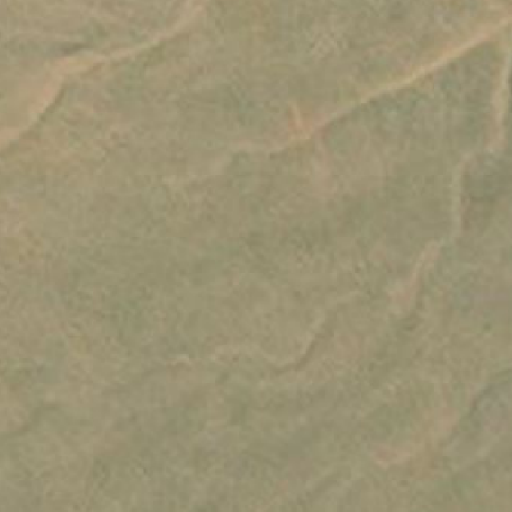

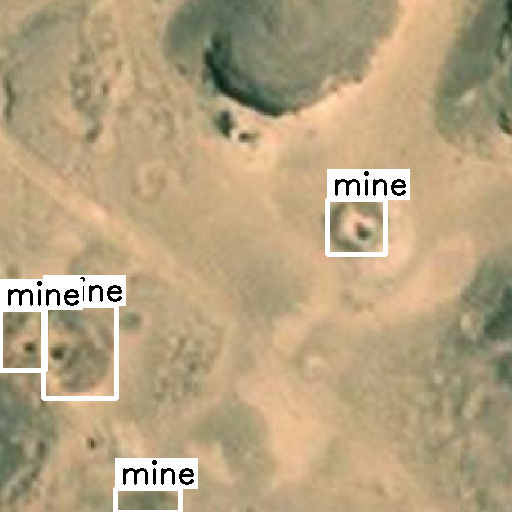

In [42]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(600))
display(dataset.visualize.ShowBoundingBoxes("209.tif"))

# Export to Yolo v5
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
Yolo creates one text file for each image in the dataset. 

In [43]:
dataset.path_to_annotations = "/content/COCO/train/annotations"
dataset.export.ExportToYoloV5()[0]

Exporting YOLO files...: 100%|██████████| 600/600 [00:00<00:00, 730.39it/s]


'training/dataset.yaml'

# Podziel na train, validate


In [44]:
# !/usr/bin/python

import os, sys


# renaming directory ''tutorialsdir"
os.rename("/content/training","/content/training_old")


In [45]:
#Specify path to the coco.json file
path_to_annotations = "/content/COCO/train/instances_image_train2023.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/content/COCO/train/image"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="Flint_mines")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/COCO/train/image,0.tif,,1,512,512,,,,,...,,,,,,,,,,1
1,/content/COCO/train/image,1.tif,,2,512,512,,,,,...,,,,,,,,,,1
2,/content/COCO/train/image,10.tif,,3,512,512,,,,,...,,,,,,,,,,1
3,/content/COCO/train/image,100.tif,,4,512,512,,,,,...,,,,,,,,,,1
4,/content/COCO/train/image,101.tif,,5,512,512,,,,,...,,,,,,,,,,1


In [46]:


print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")



Number of images: 600
Number of classes: 1
Classes:['mine']
Class counts:
        525
mine    208
Name: cat_name, dtype: int64


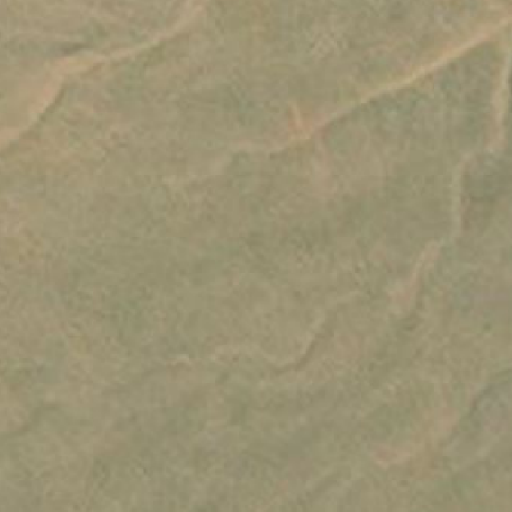

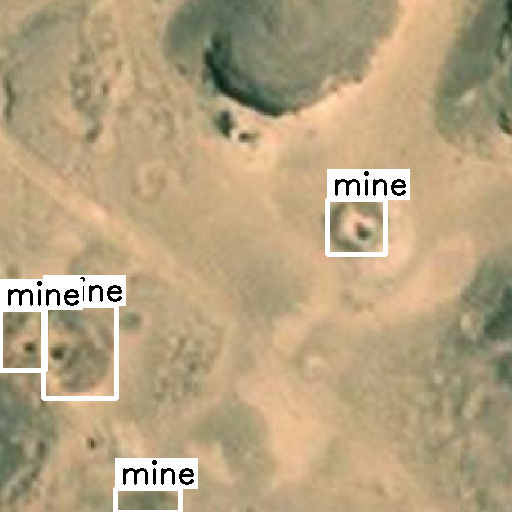

In [47]:


from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(600))
display(dataset.visualize.ShowBoundingBoxes("209.tif"))



In [48]:
dataset.splitter.GroupShuffleSplit(train_pct=.5, val_pct=.25, test_pct=.25)
dataset.analyze.ShowClassSplits()

/usr/local/lib/python3.9/dist-packages/pylabel/splitter.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dataset.df = df_train.append(df_test)


,all,train,test,val
cat_name,,,,
,0.716235,0.710383,0.737705,0.706522
mine,0.283765,0.289617,0.262295,0.293478


In [49]:
dataset.splitter.StratifiedGroupShuffleSplit(train_pct=.5, val_pct=.25, test_pct=.25, batch_size=1)
dataset.analyze.ShowClassSplits()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.9/dist-packages/pylabel/splitter.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_loss_diff_train = calc_mse_loss(df_train) - calc_mse_loss(df_train.append(batch_df, ignore_index=True))
/usr/local/lib/python3.9/dist-packages/pylabel/splitter.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_loss_diff_val = calc_mse_loss(df_val) - calc_mse_loss(df_val.append(batch_df, ignore_index=True))
/usr/local/lib/python3.9/dist-packages/pylabel/splitter.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_loss_diff_test = calc_mse_loss(df_test) - calc_mse_loss(df_test.append(batch_df, ignore_index=True))
/usr/local/lib/python3.

,all,train,test,val
cat_name,,,,
,0.716235,0.715862,0.75,0.75
mine,0.283765,0.284138,0.25,0.25


In [50]:
dataset.export.ExportToYoloV5(output_path='/content/training/labels',yaml_file='/content/training/dataset.yaml', copy_images=True, use_splits=True)

Exporting YOLO files...: 100%|██████████| 600/600 [00:02<00:00, 279.12it/s]


['/content/training/dataset.yaml',
 '/content/training/labels/train/577.txt',
 '/content/training/labels/train/174.txt',
 '/content/training/labels/train/478.txt',
 '/content/training/labels/train/472.txt',
 '/content/training/labels/train/264.txt',
 '/content/training/labels/train/525.txt',
 '/content/training/labels/train/209.txt',
 '/content/training/labels/train/428.txt',
 '/content/training/labels/train/370.txt',
 '/content/training/labels/train/215.txt',
 '/content/training/labels/train/267.txt',
 '/content/training/labels/train/277.txt',
 '/content/training/labels/train/583.txt',
 '/content/training/labels/train/247.txt',
 '/content/training/labels/train/23.txt',
 '/content/training/labels/train/431.txt',
 '/content/training/labels/train/240.txt',
 '/content/training/labels/train/52.txt',
 '/content/training/labels/train/452.txt',
 '/content/training/labels/train/132.txt',
 '/content/training/labels/train/269.txt',
 '/content/training/labels/train/128.txt',
 '/content/training/l

In [51]:
!cat '/content/training/dataset.yaml'

names:
- mine
nc: 1
path: ..
test: /content/training/images/test
train: /content/training/images/train
val: /content/training/images/val


In [52]:
# !/usr/bin/python

import os, sys


# renaming directory ''tutorialsdir"
os.rename("/content/training","/content/Dataset")

In [53]:
!zip -r WeS_11_3_wgs_YOLO.zip /content/Dataset/

  adding: content/Dataset/ (stored 0%)
  adding: content/Dataset/dataset.yaml (deflated 45%)
  adding: content/Dataset/labels/ (stored 0%)
  adding: content/Dataset/labels/test/ (stored 0%)
  adding: content/Dataset/labels/test/412.txt (stored 0%)
  adding: content/Dataset/labels/test/579.txt (stored 0%)
  adding: content/Dataset/labels/test/335.txt (deflated 13%)
  adding: content/Dataset/labels/test/67.txt (stored 0%)
  adding: content/Dataset/labels/train/ (stored 0%)
  adding: content/Dataset/labels/train/274.txt (stored 0%)
  adding: content/Dataset/labels/train/397.txt (deflated 13%)
  adding: content/Dataset/labels/train/480.txt (stored 0%)
  adding: content/Dataset/labels/train/92.txt (stored 0%)
  adding: content/Dataset/labels/train/283.txt (stored 0%)
  adding: content/Dataset/labels/train/334.txt (stored 0%)
  adding: content/Dataset/labels/train/443.txt (stored 0%)
  adding: content/Dataset/labels/train/154.txt (stored 0%)
  adding: content/Dataset/labels/train/231.txt (st

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import shutil

In [57]:
shutil.copy("/content/WeS_11_3_wgs_YOLO.zip","/content/drive/MyDrive/Mining")

'/content/drive/MyDrive/Mining/WeS_11_3_wgs_YOLO.zip'

In [58]:
from google.colab import drive
drive.flush_and_unmount()

Delete all

In [59]:
import os
os.remove("/content/Wes_11_3_wgs_COCO.zip")

os.remove("/content/WeS_11_3_wgs_YOLO.zip")

path = "/content/training_old/labels"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

%rm -rf "/content/training_old/labels"

%rm -rf "/content/training_old/"


path = "/content/Dataset/images/test"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/Dataset/images/train"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/Dataset/images/val"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/Dataset/labels/test"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/Dataset/labels/train"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/Dataset/labels/val"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')


os.remove("/content/Dataset/dataset.yaml")

%rm -rf "/content/Dataset"


path = "/content/COCO/annotations"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/COCO/image"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/COCO/train/annotations"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

path = "/content/COCO/train/image"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')



%rm -rf "/content/COCO"